In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import PIL
from datetime import datetime
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [69]:
import os
import seaborn as sns
import torch

In [6]:
path='../cat-dogs-data-np/'

In [7]:
!ls {path}

Icon?       tmp         valid       x_train.npy y_train.npy
models      train       x_test.npy  y_test.npy


In [8]:
size=224

In [9]:
arch=resnet34
data=ImageClassifierData.from_paths(path,tfms=tfms_from_model(arch,size))

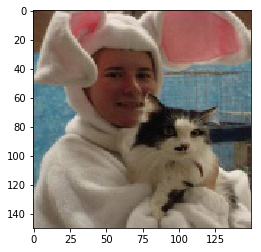

In [10]:
imgs=os.listdir(path+'train/cat')
im=plt.imread(path+'train/cat/'+imgs[800])
plt.imshow(im)

In [166]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [146]:
learn.fit(0.1,3,cycle_len=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=9), HTML(value='')))

[0.      0.3407  0.26504 0.97656]                          
[1.      0.23371 0.07232 0.99023]                          
[2.      0.18771 0.09652 0.98633]                          
[3.      0.17388 0.05241 0.99316]                          
[4.      0.13243 0.06282 0.9873 ]                          
[5.      0.08329 0.03168 0.99316]                           
[6.      0.07033 0.04259 0.99219]                           
[7.      0.06214 0.03682 0.99316]                           
[8.      0.04346 0.03296 0.99414]                           



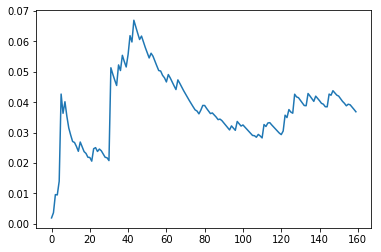

In [37]:
plt.plot(learn.sched.losses)

In [38]:
logs_predict=learn.predict()

In [39]:
def plot(idxs):
    col=4
    if len(idxs)<4:
        col=len(idxs)
    idxs=np.random.choice(idxs,col,replace=False)
    imgs=[plt.imread(path+data.val_ds.fnames[ix]) for ix in idxs]
    f=plt.figure(figsize=(12,10))
    for ix in range(col):
        sp=f.add_subplot(1,col,ix+1)
        sp.axis('off')
        plt.title(np.exp(logs_predict[idxs[ix]]))
        plt.imshow(imgs[ix])   
def plot_where(cond):
    if(cond==False):
        idxs=np.where(data.val_y!=np.argmax(logs_predict,1))[0]
    else:
        idxs=np.where(data.val_y==np.argmax(logs_predict,1))[0]
    plot(idxs)

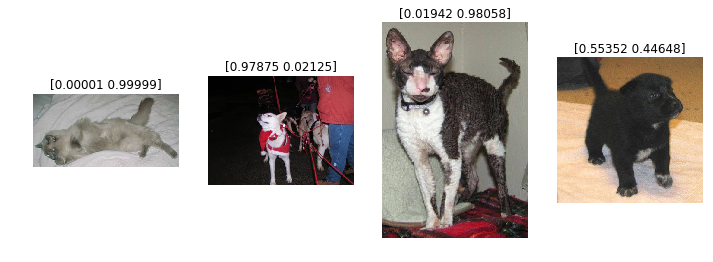

In [40]:
plot_where(False)

In [17]:
def most_correct(val):
    idxs=[[logs_predict[ix][val],ix] for ix in np.where(data.val_y==val)[0]]
    idxs=np.array(idxs[-4:],dtype=int)
    plot(idxs[:,1])
    

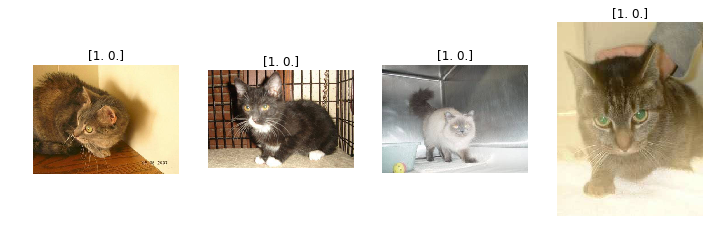

In [45]:
most_correct(0)

In [41]:
def most_incorrect(val):
    idxs=np.where(data.val_y!=np.argmax(logs_predict,1))[0]
    arr=[]
    for ix in idxs:
        if data.val_y[ix]==val:
            arr.append(ix)
    plot(arr)

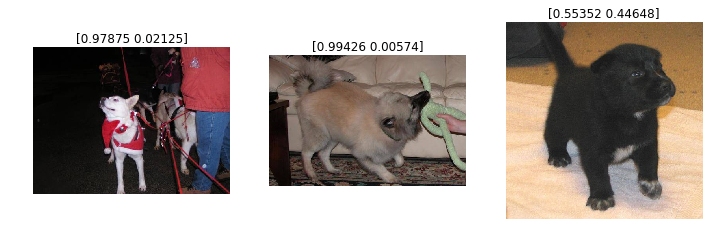

In [43]:
most_incorrect(1)

In [54]:
def most_uncertain():
    idxs=np.where(np.max(np.exp(logs_predict),axis=1) <0.6 )[0]
    plot(idxs)

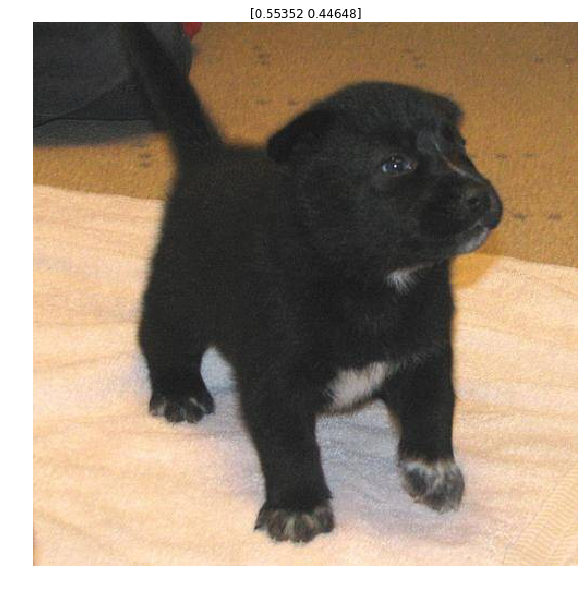

In [55]:
most_uncertain()

In [59]:
tfms=tfms_from_model(arch,size,aug_tfms=transforms_side_on,max_zoom=1.1)

In [140]:
def get_augs():
    data = ImageClassifierData.from_paths(path, bs=4, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[3]

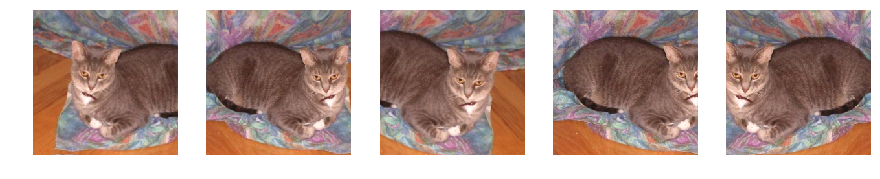

In [144]:
f,ax=plt.subplots(1,5,figsize=(15,15))
for i in range(5):
    ax[i].axis('off')
    ax[i].imshow(get_augs())
plt.show()

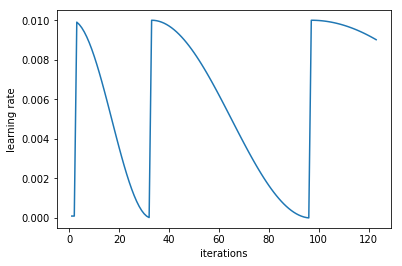

In [168]:
learn.sched.plot_lr()

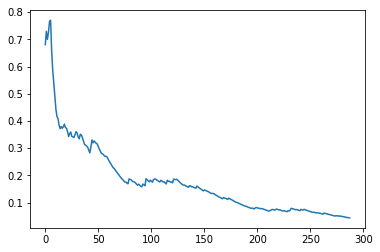

In [155]:
plt.plot(learn.sched.losses)